$$
\begin{align}
\hat{y_{i}} &= \sum_{j}^{p} x_{ij} \cdot \beta_{j} \\
f\left( x_{i} \right) &=  \sum_{j}^{p} x_{ij} \cdot \beta_{j}
\end{align}
$$



$$\hat{y_{i}} = \sigma \left(f \left( x_{i} \right) \right)$$

$$\sigma \left(f \left( x_{i} \right) \right) = \frac{1}{1 + e^{-f \left( x_{i} \right)}}$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

%config InlineBackend.figure_format = 'retina'

In [2]:
cmap = plt.rcParams["axes.prop_cycle"].by_key()["color"]
BLUE = cmap[0]
ORANGE = cmap[1]
GREEN = cmap[2]
PURPLE = cmap[4]

In [3]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["axes.titlesize"] = 18

In [4]:
RANDOM_STATE = 666

$$ 
\mathcal{L}\left(\mathbf{\vec{\beta}}\right)
= -\sum_{i=1}^{N} y_{i} log\left( \sigma \left( \mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta}} \right) \right)
+ \left( 1 - y_{i} \right) log \left( 1 - \sigma \left( \mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta}} \right) \right)
$$

In [5]:
f_x = np.linspace(-15, 15, 201)
sigma_f = 1 / (1 + np.exp(-f_x))

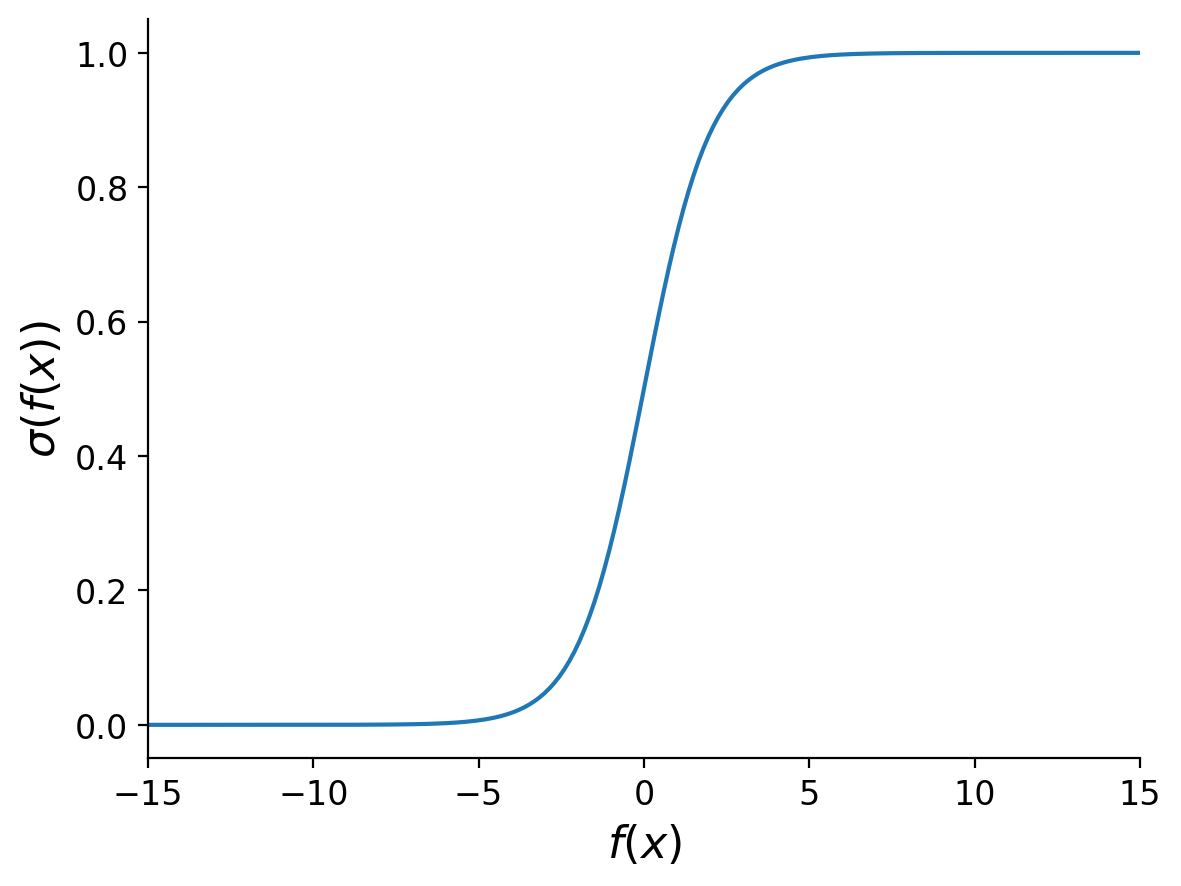

In [6]:
fig, ax = plt.subplots()
ax.plot(f_x, sigma_f)
ax.set_xlim(-15, 15)
ax.set_xlabel("$f\\left(x\\right)$")
ax.set_ylabel("$\\sigma\\left(f\\left(x\\right)\\right)$")
None

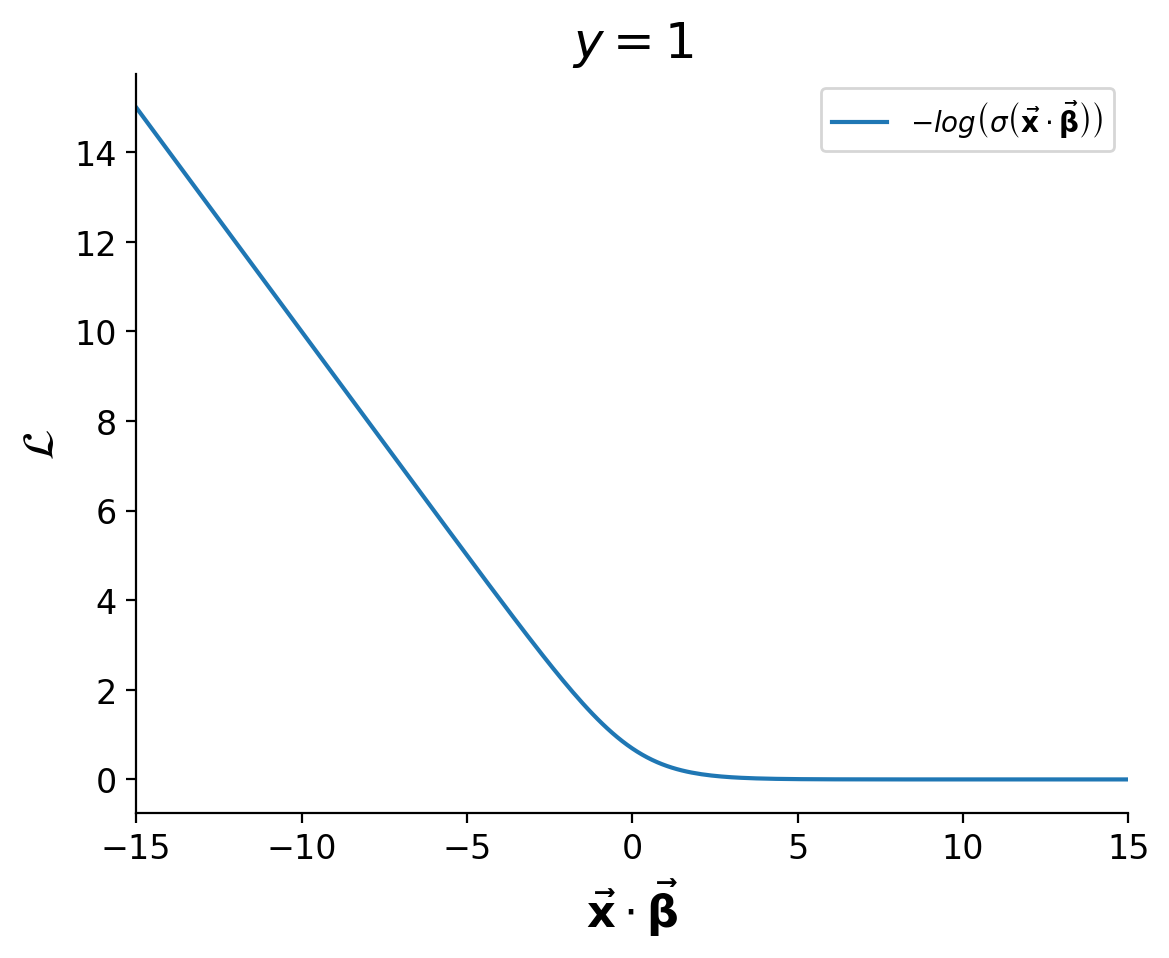

In [7]:
fig, ax = plt.subplots()
ax.plot(f_x, -np.log(sigma_f), color=BLUE)
ax.set_xlim(-15, 15)
ax.set_xlabel(r"$\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}$")
ax.set_ylabel(r"$\mathcal{L}$")
ax.legend(
    [r"$-log\left(\sigma\left(\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}\right)\right)$"]
)
ax.set_title(r"$y = 1$")
None

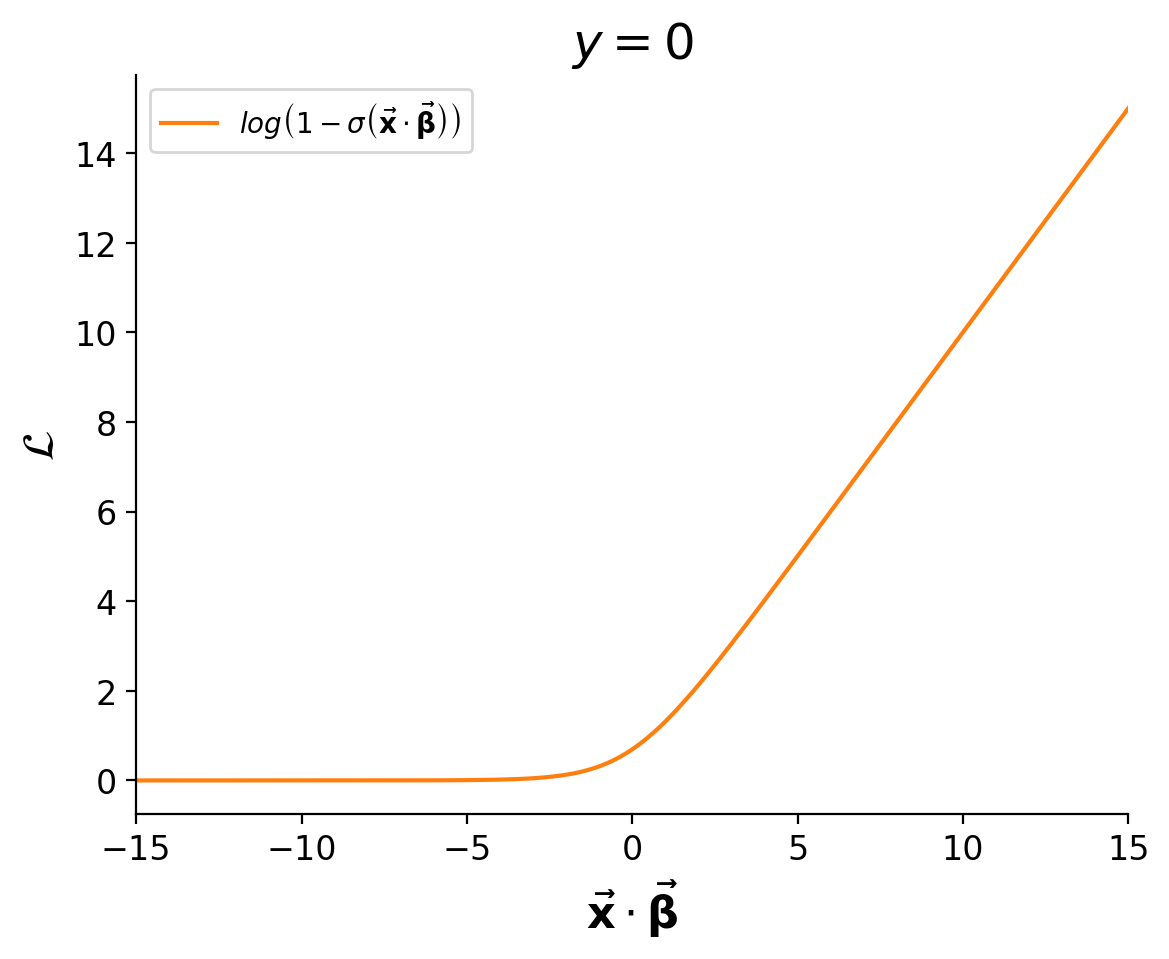

In [8]:
fig, ax = plt.subplots()
ax.plot(f_x, -np.log(1 - sigma_f), color=ORANGE)
ax.set_xlim(-15, 15)
ax.set_xlabel(r"$\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}$")
ax.set_ylabel(r"$\mathcal{L}$")
ax.legend(
    [
        r"$log\left(1 - \sigma\left(\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}\right)\right)$"
    ]
)
ax.set_title(r"$y = 0$")
None

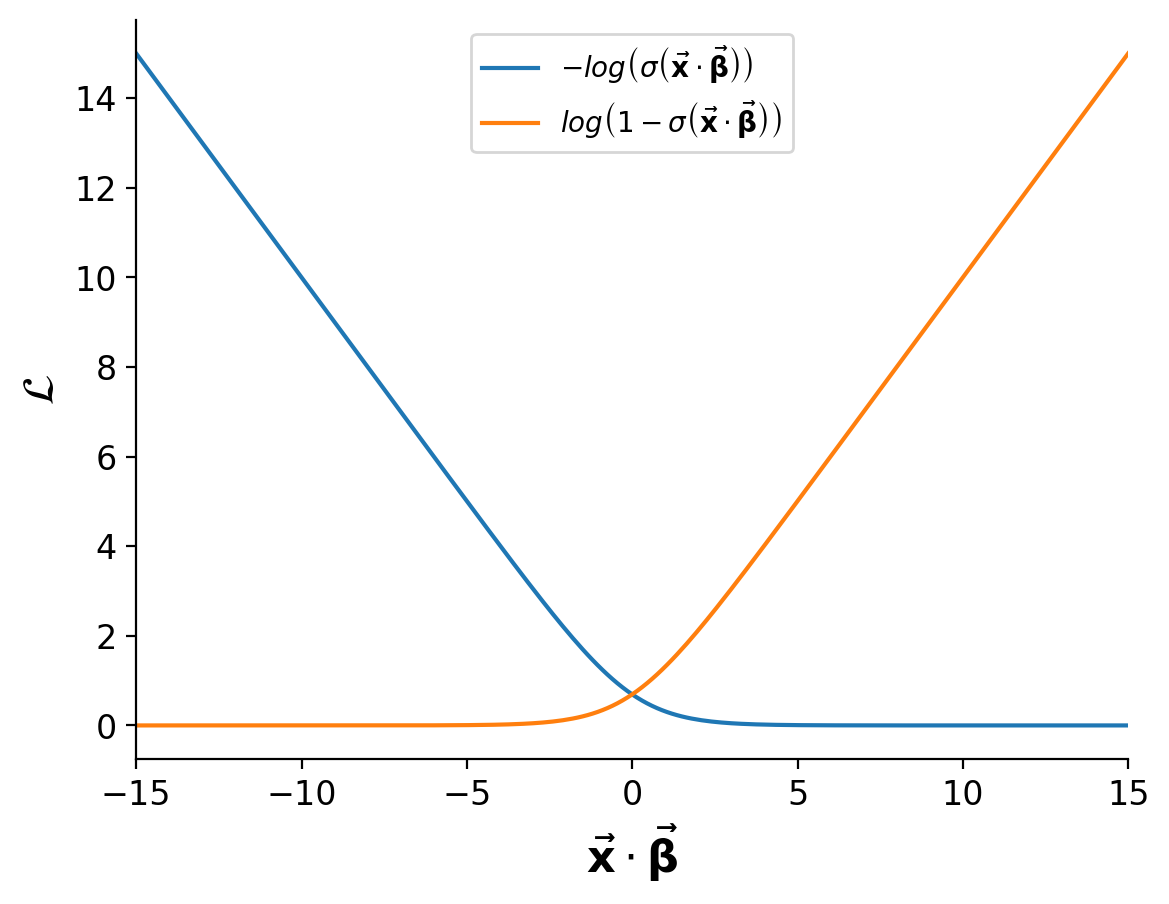

In [9]:
fig, ax = plt.subplots()
ax.plot(f_x, -np.log(sigma_f), color=BLUE)
ax.plot(f_x, -np.log(1 - sigma_f), color=ORANGE)
ax.set_xlim(-15, 15)
ax.set_xlabel(r"$\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}$")
ax.set_ylabel(r"$\mathcal{L}$")
ax.legend(
    [
        r"$-log\left(\sigma\left(\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}\right)\right)$",
        r"$log\left(1 - \sigma\left(\mathbf{\vec{x}}\cdot\mathbf{\vec{\beta}}\right)\right)$",
    ]
)
None

$$ \frac{\partial\mathcal{L}}{\partial\mathbf{\vec{\beta}}} = \sum_{i=1}^{N} \biggl(y_{i} - \frac{1}{1 + e^{\left( \mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta}}\right)}} \biggr) \mathbf{\vec{x_{i}}}$$

In [10]:
easy_data = pd.read_json("../data/easy_2d_classification_data.json")

In [11]:
threshold = 0.4

In [12]:
X = easy_data[["x", "y"]]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(easy_data["color"])
# C is the inverse of the regulariazation strength.
# Setting it to a large value makes it roughly 0.
model = LogisticRegression(C=np.finfo("float32").max, random_state=RANDOM_STATE)
model.fit(X, y)

LogisticRegression(C=3.4028235e+38, random_state=666)

In [13]:
y_pred = model.predict_proba(X)[:, 1]

In [14]:
confusion_matrix(y, y_pred >= threshold)

array([[204,  41],
       [ 16, 198]])

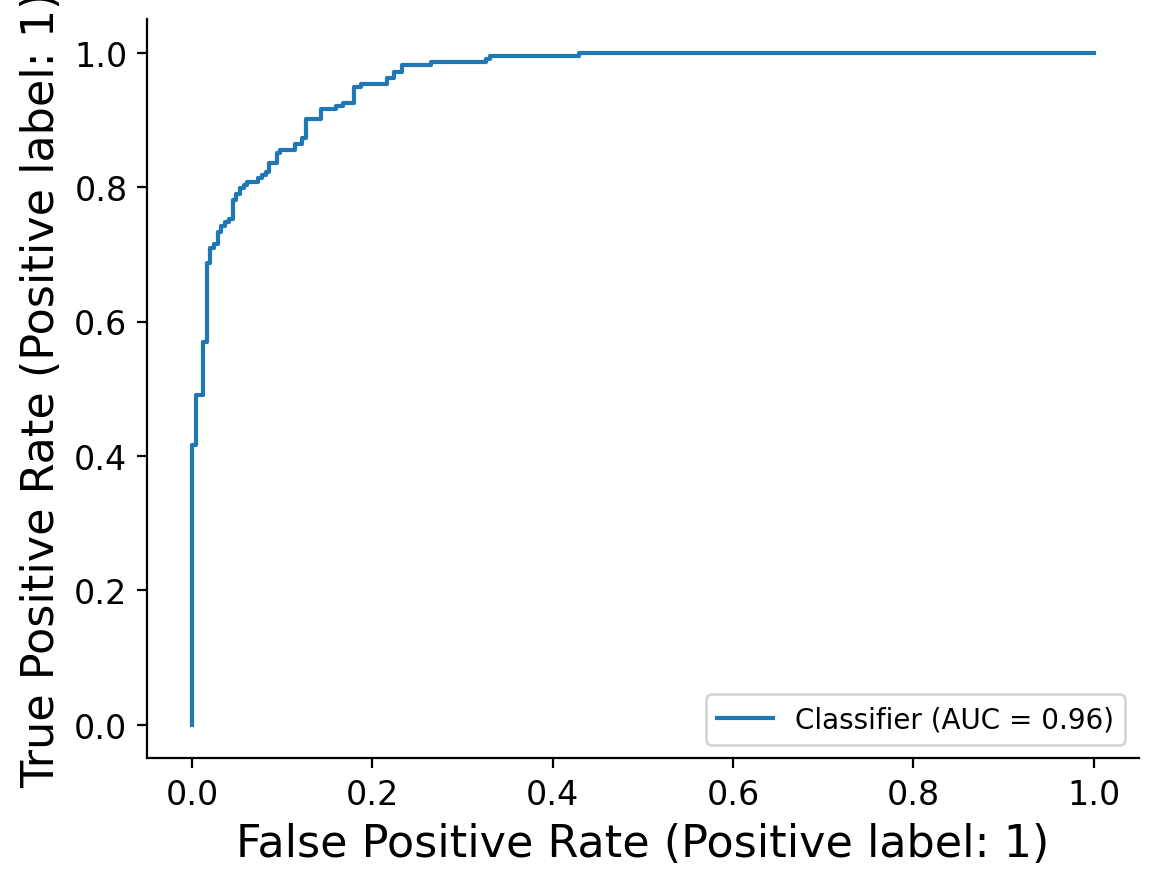

In [15]:
ax = RocCurveDisplay.from_predictions(y, y_pred)

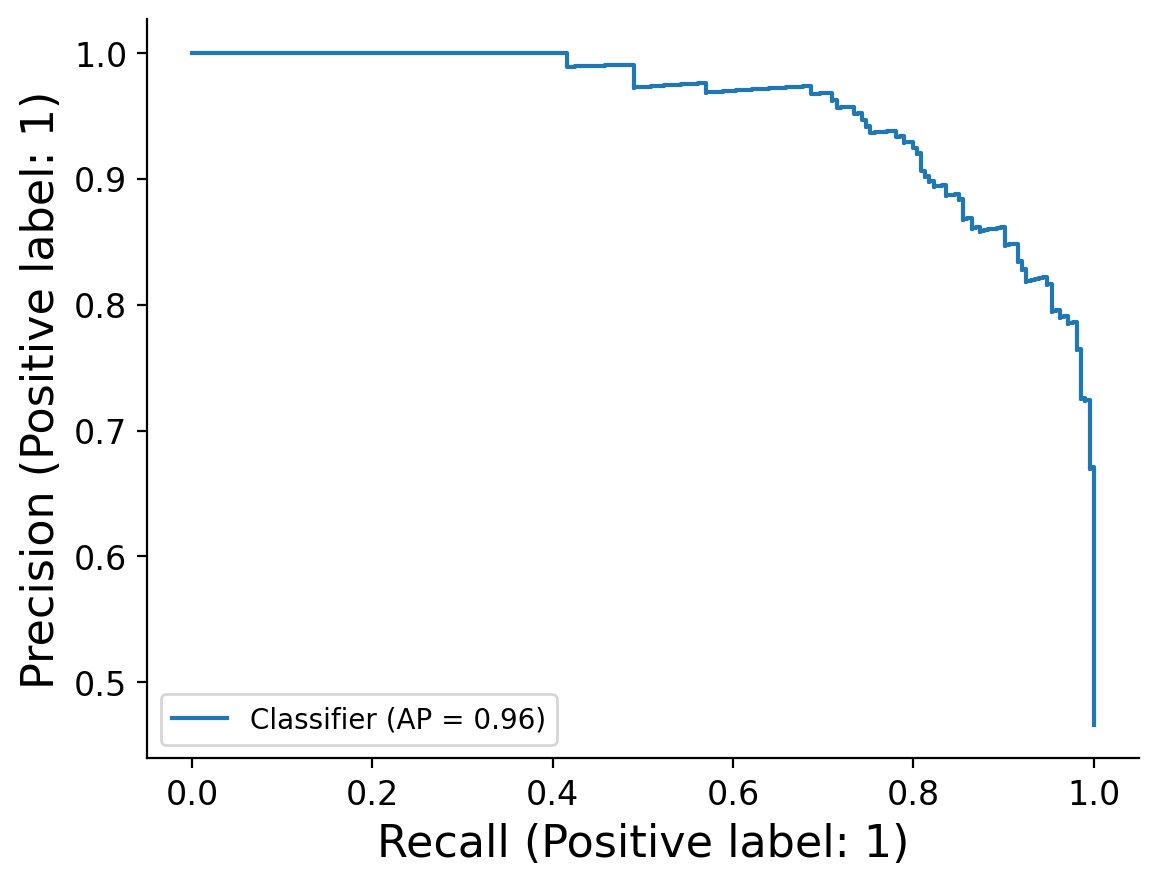

In [16]:
ax = PrecisionRecallDisplay.from_predictions(y, y_pred)

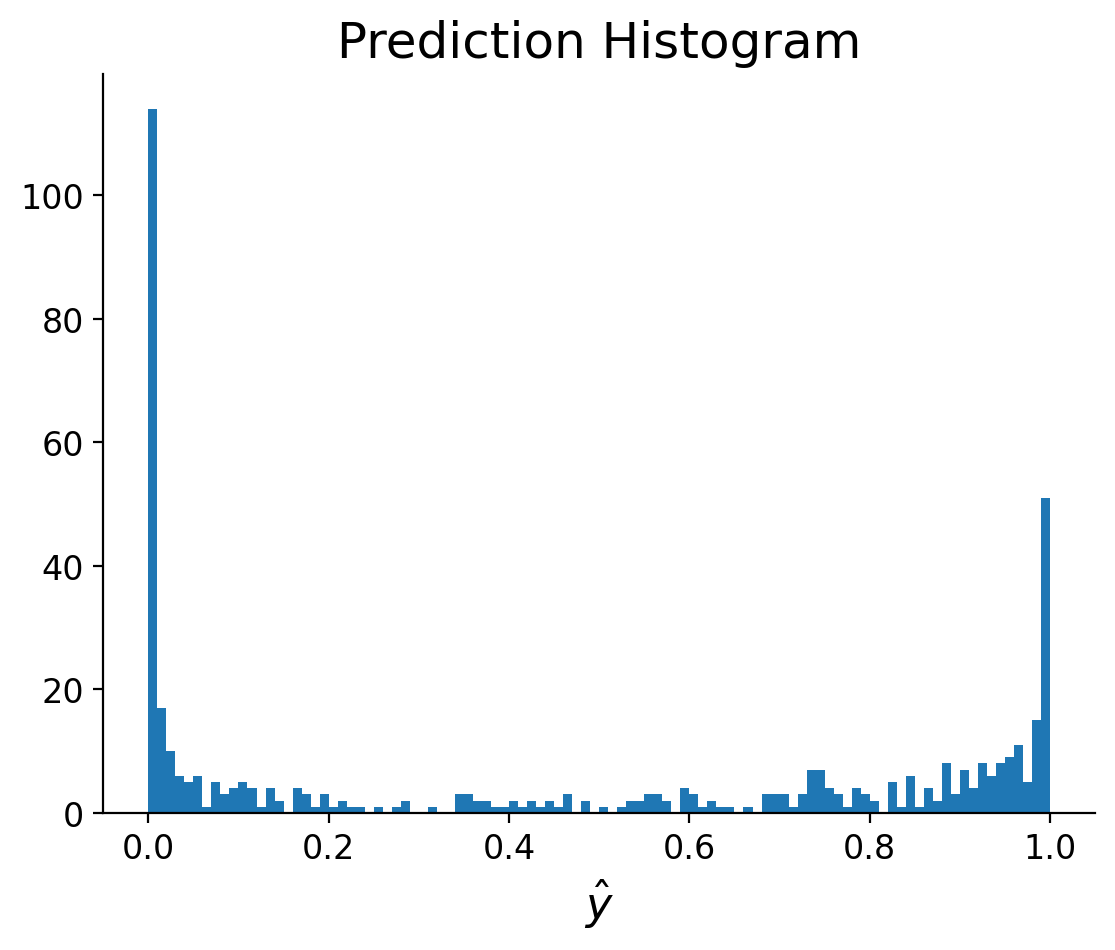

In [17]:
fig, ax = plt.subplots()
bins = np.linspace(0, 1, 101)
width = bins[1] - bins[0]
hist, bin_edges = np.histogram(y_pred, bins=bins)
ax.bar(bin_edges[:-1] + width / 2, hist, width=width)
ax.set_xlabel(r"$\hat{y}$")
ax.set_title("Prediction Histogram")
None

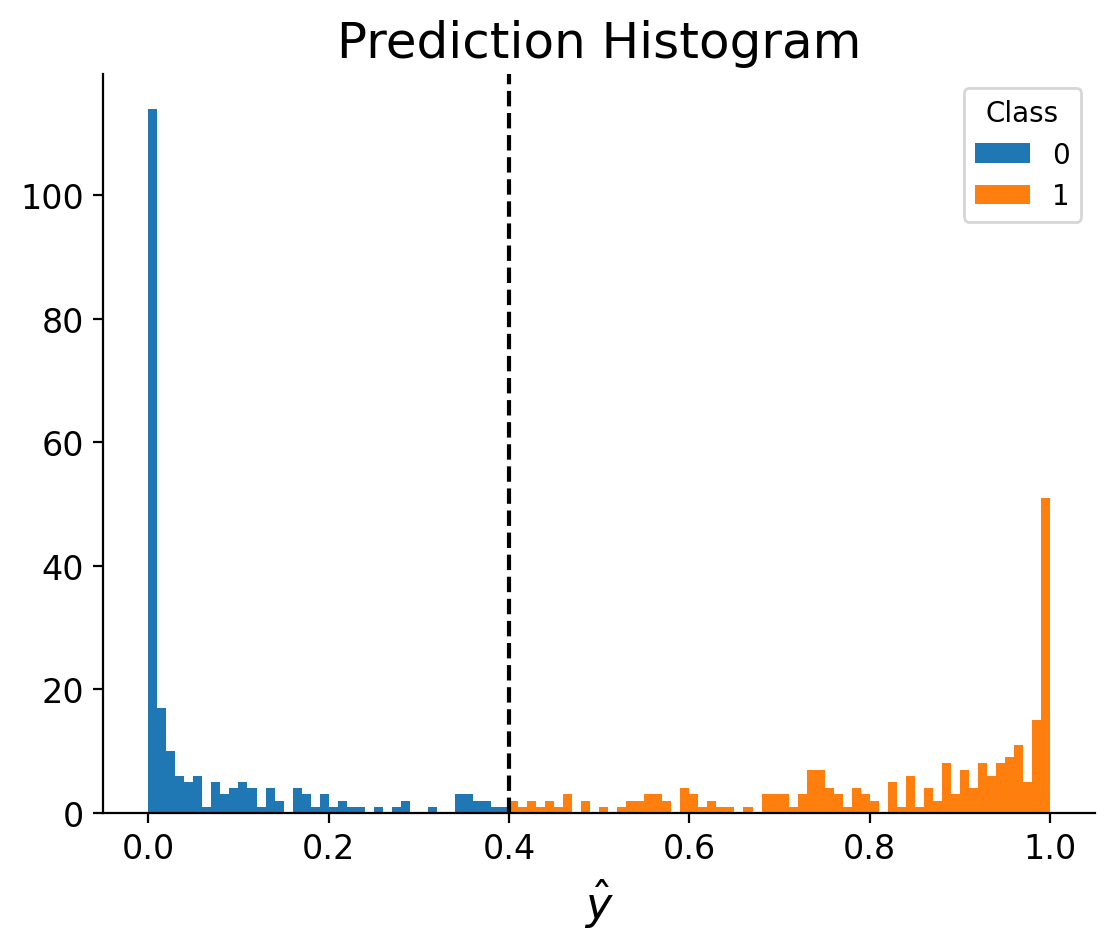

In [18]:
fig, ax = plt.subplots()
bins = np.linspace(0, 1, 101)

width = bins[1] - bins[0]
false_mask = y_pred < threshold
true_mask = y_pred >= threshold
for label, mask in zip([0, 1], [false_mask, true_mask]):
    hist, bin_edges = np.histogram(y_pred[mask], bins=bins)
    ax.bar(bin_edges[:-1] + width / 2, hist, width=width, label=label)


_, ymax = ax.get_ylim()
ax.plot([threshold, threshold], [0, ymax], "k--")
ax.set_ylim((0, ymax))
ax.set_xlabel(r"$\hat{y}$")
ax.set_title("Prediction Histogram")
ax.legend(title="Class")
None

In [19]:
def get_decision_boundary(model, data, threshold, eps=1, grid_resolution=201):
    """
    Stolen from
    https://github.com/scikit-learn/scikit-learn/blob/36958fb240fbe435673a9e3c52e769f01f36bec0/sklearn/inspection/_plot/decision_boundary.py#L290
    """
    BOUNDARY_DELTA = 0.01

    x0 = data["x"].values
    x1 = data["y"].values
    x0_min, x0_max = x0.min() - eps, x0.max() + eps
    x1_min, x1_max = x1.min() - eps, x1.max() + eps

    xx0, xx1 = np.meshgrid(
        np.linspace(x0_min, x0_max, grid_resolution),
        np.linspace(x1_min, x1_max, grid_resolution),
    )
    X_mesh = np.c_[xx0.ravel(), xx1.ravel()]
    predictions = model.predict_proba(X_mesh)[:, 1]
    boundary = np.abs(predictions - threshold) < BOUNDARY_DELTA
    return X_mesh[boundary, 0], X_mesh[boundary, 1]

In [20]:
def plot_2d_classification(data):
    fig, ax = plt.subplots()
    ax.spines.top.set_visible(True)
    ax.spines.right.set_visible(True)
    colors = sorted(data["color"].unique().tolist())
    for label, color in enumerate(colors):
        mask = data["color"] == color
        ax.scatter(x=data[mask]["x"], y=data[mask]["y"], label=label)

    ax.set_ylabel("$X_{1}$")
    ax.set_xlabel("$X_{2}$")
    ax.legend(title="Class")
    return ax

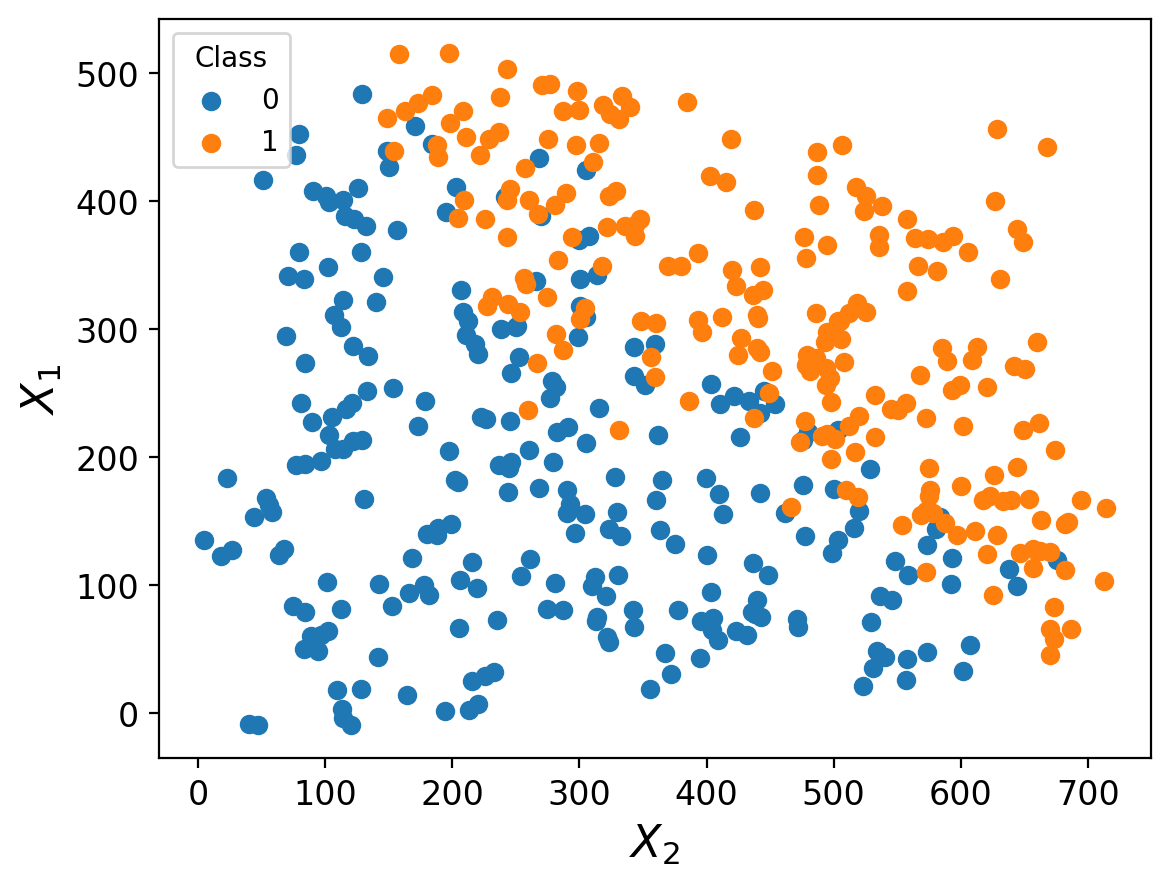

In [21]:
ax = plot_2d_classification(easy_data)

/Users/erosenthal/.pyenv/versions/week4/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


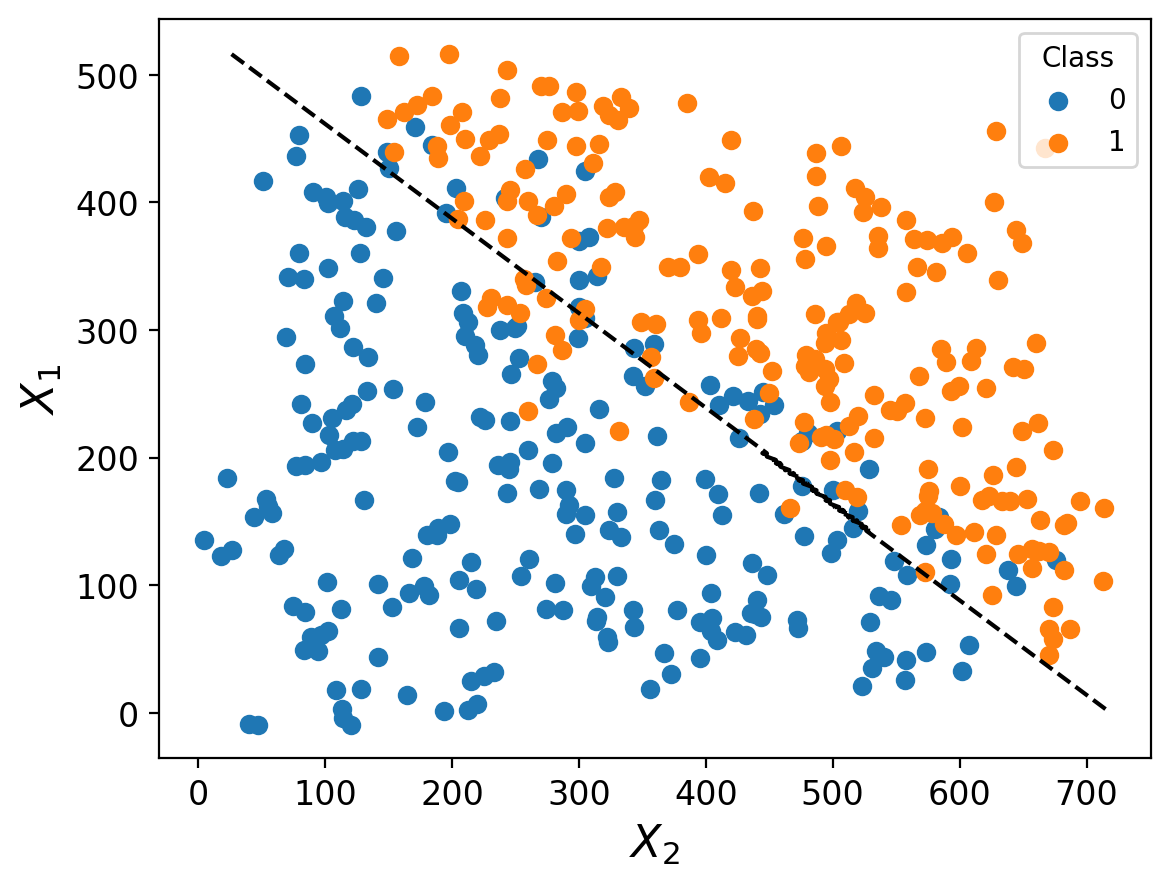

In [22]:
ax = plot_2d_classification(easy_data)
decision_boundary_x, decision_boundary_y = get_decision_boundary(
    model, easy_data, threshold
)
ax.plot(decision_boundary_x, decision_boundary_y, "k--")

/Users/erosenthal/.pyenv/versions/week4/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


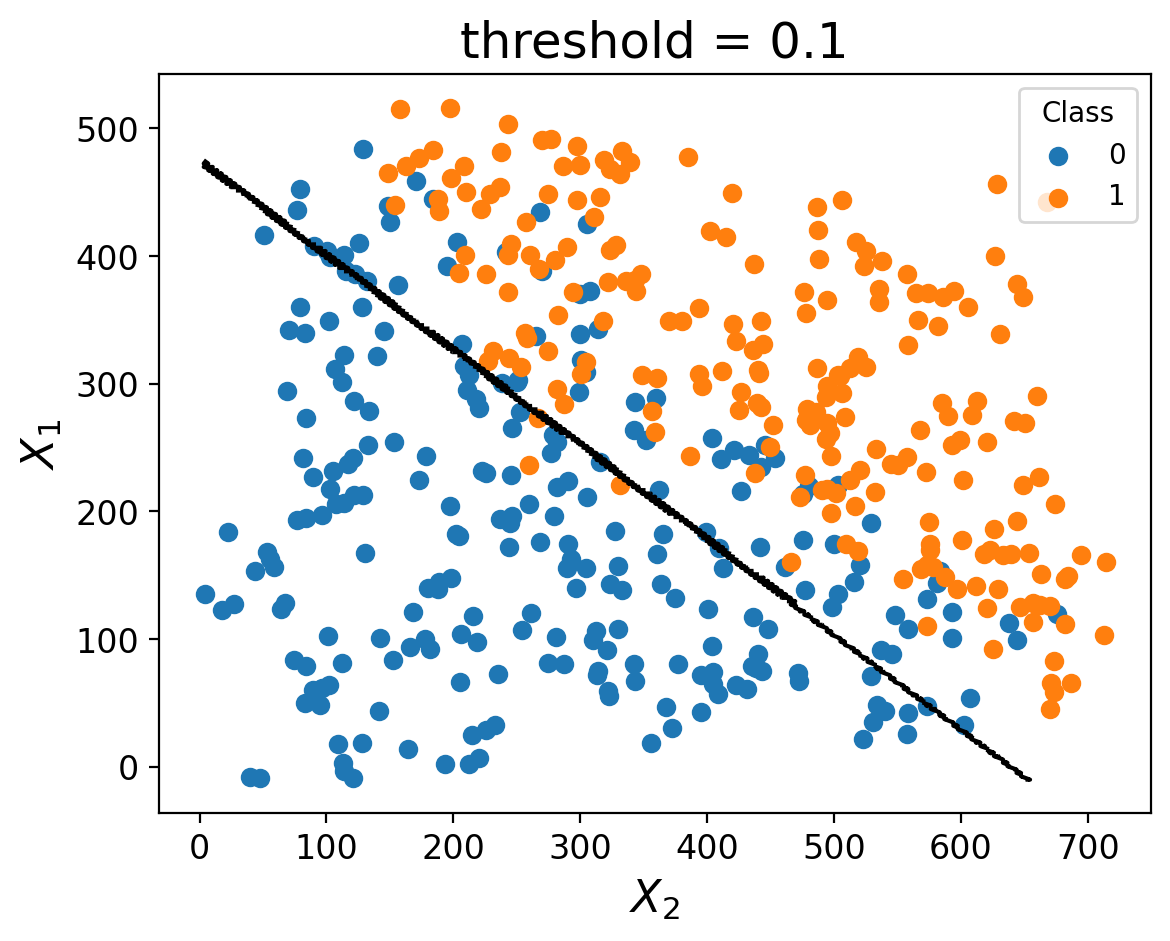

In [23]:
ax = plot_2d_classification(easy_data)
decision_boundary_x, decision_boundary_y = get_decision_boundary(model, easy_data, 0.1)
ax.plot(decision_boundary_x, decision_boundary_y, "k--")
ax.set_title("threshold = 0.1")
None

/Users/erosenthal/.pyenv/versions/week4/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


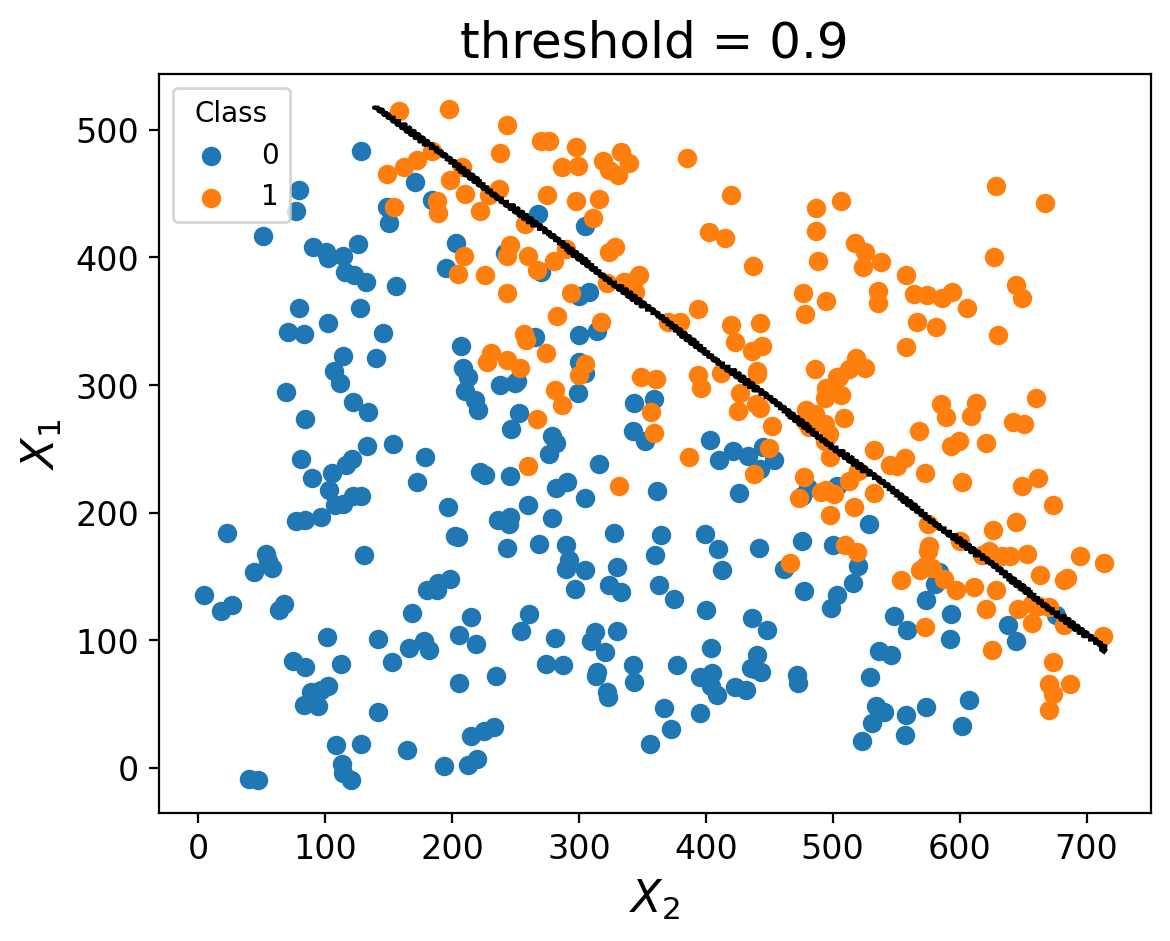

In [24]:
ax = plot_2d_classification(easy_data)
decision_boundary_x, decision_boundary_y = get_decision_boundary(model, easy_data, 0.9)
ax.plot(decision_boundary_x, decision_boundary_y, "k--")
ax.set_title("threshold = 0.9")
None

In [25]:
hard_data = pd.read_json("../data/hard_2d_classification_data.json")

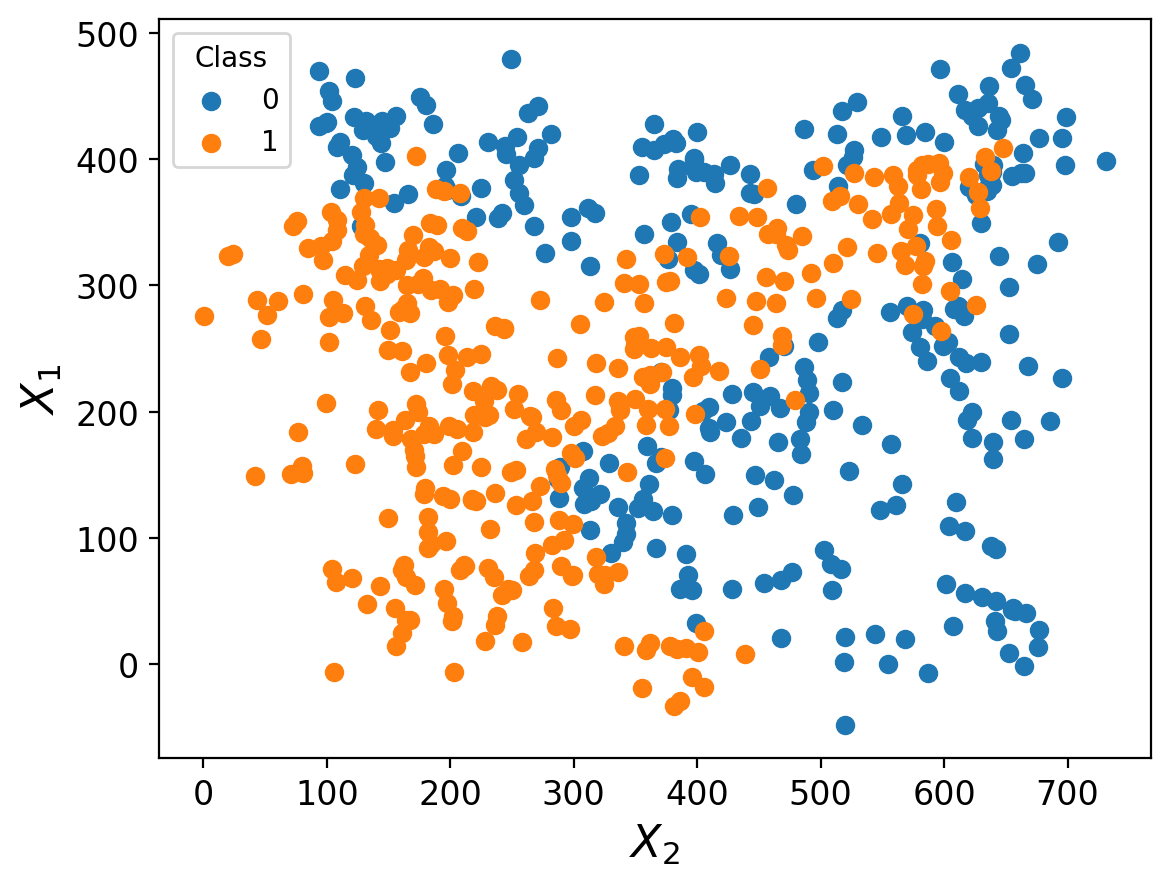

In [26]:
plot_2d_classification(hard_data)
None

In [27]:
X = hard_data[["x", "y"]]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(hard_data["color"])
# C is the inverse of the regulariazation strength.
# Setting it to a large value makes it roughly 0.
model = LogisticRegression(C=np.finfo("float32").max, random_state=RANDOM_STATE)
model.fit(X, y)

LogisticRegression(C=3.4028235e+38, random_state=666)

/Users/erosenthal/.pyenv/versions/week4/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


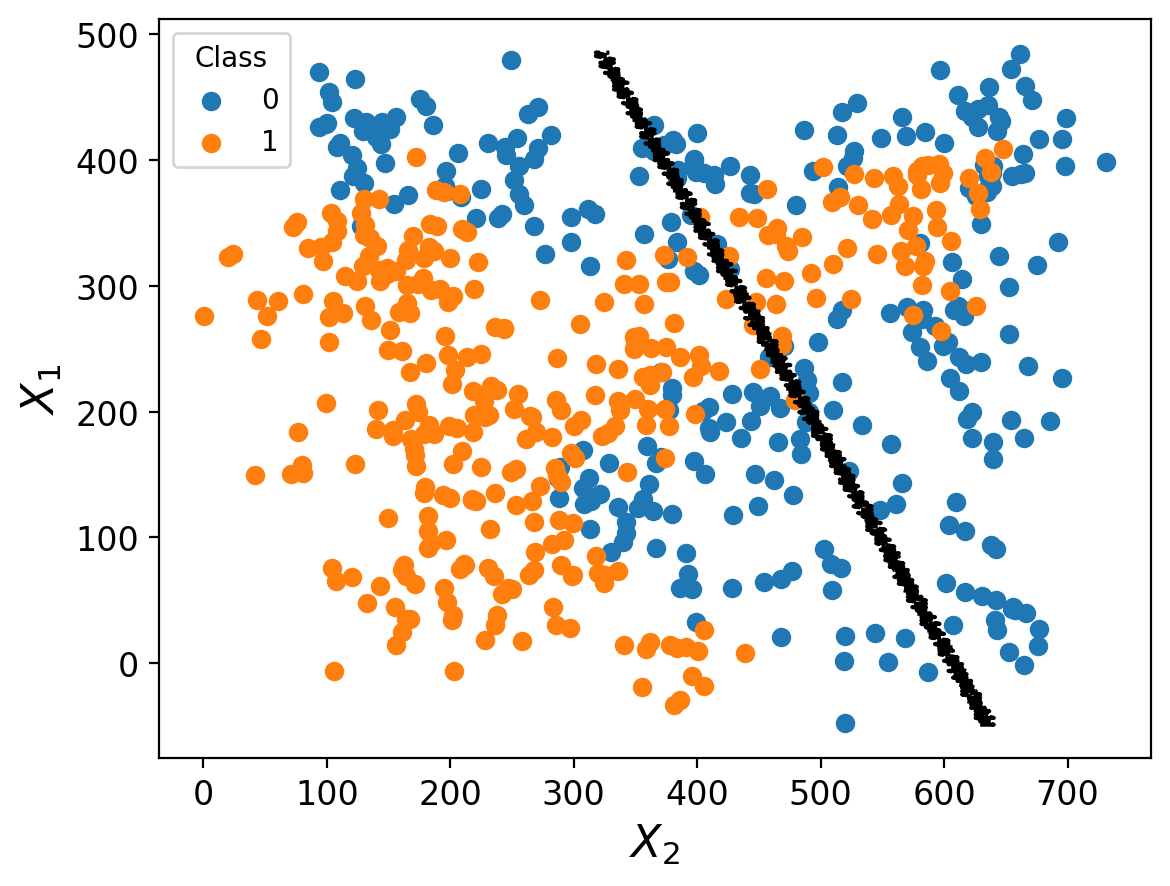

In [28]:
ax = plot_2d_classification(hard_data)
decision_boundary_x, decision_boundary_y = get_decision_boundary(
    model, hard_data, threshold
)
ax.plot(decision_boundary_x, decision_boundary_y, "k--")
None

In [29]:
model = Pipeline(
    [
        ("poly", PolynomialFeatures()),
        (
            "estimator",
            LogisticRegression(
                C=np.finfo("float32").max, max_iter=10_001, random_state=RANDOM_STATE
            ),
        ),
    ]
)
model.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('estimator',
                 LogisticRegression(C=3.4028235e+38, max_iter=10001,
                                    random_state=666))])

/Users/erosenthal/.pyenv/versions/week4/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


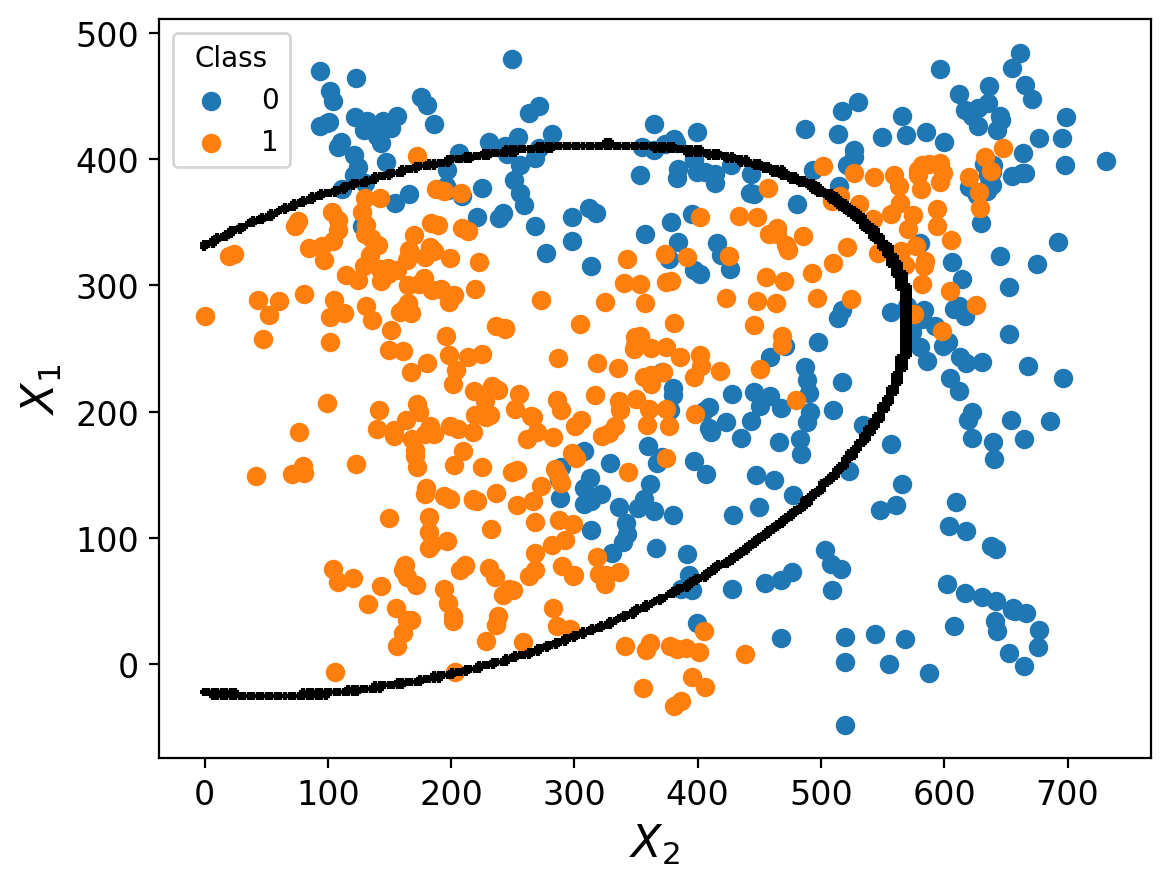

In [30]:
ax = plot_2d_classification(hard_data)
decision_boundary_x, decision_boundary_y = get_decision_boundary(
    model, hard_data, threshold
)
ax.scatter(decision_boundary_x, decision_boundary_y, color="k", marker="+", s=8)

$$ 
\begin{align}
\hat{y_{i}} & = \beta_{0} + \beta_{1} \cdot X_{i1} + \beta_{2} \cdot X_{i2} \\
                  & + \beta_{3} \cdot X_{i1} \cdot X_{i2} + \beta_{4} \cdot X_{i1}^{2} \\
                  & + \beta_{5} \cdot X_{i2}^{2}
\end{align}
$$

$$ accuracy = \frac{TP + TN}{N} $$

$$ precision = \frac{TP}{TP + FP} $$

$$ recall = \frac{TP}{TP + FN} $$

In [31]:
multi_data = pd.read_json("../data/multiclass_data.json")

In [32]:
# multi_data = multi_data[multi_data["color"] != "d"]

In [33]:
X = multi_data[["x", "y"]]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(multi_data["color"])
# C is the inverse of the regulariazation strength.
# Setting it to a large value makes it roughly 0.
model = LogisticRegression(C=np.finfo("float32").max, random_state=RANDOM_STATE, multi_class="ovr")
model.fit(X, y)

LogisticRegression(C=3.4028235e+38, multi_class='ovr', random_state=666)

In [34]:
y_pred = model.predict_proba(X)

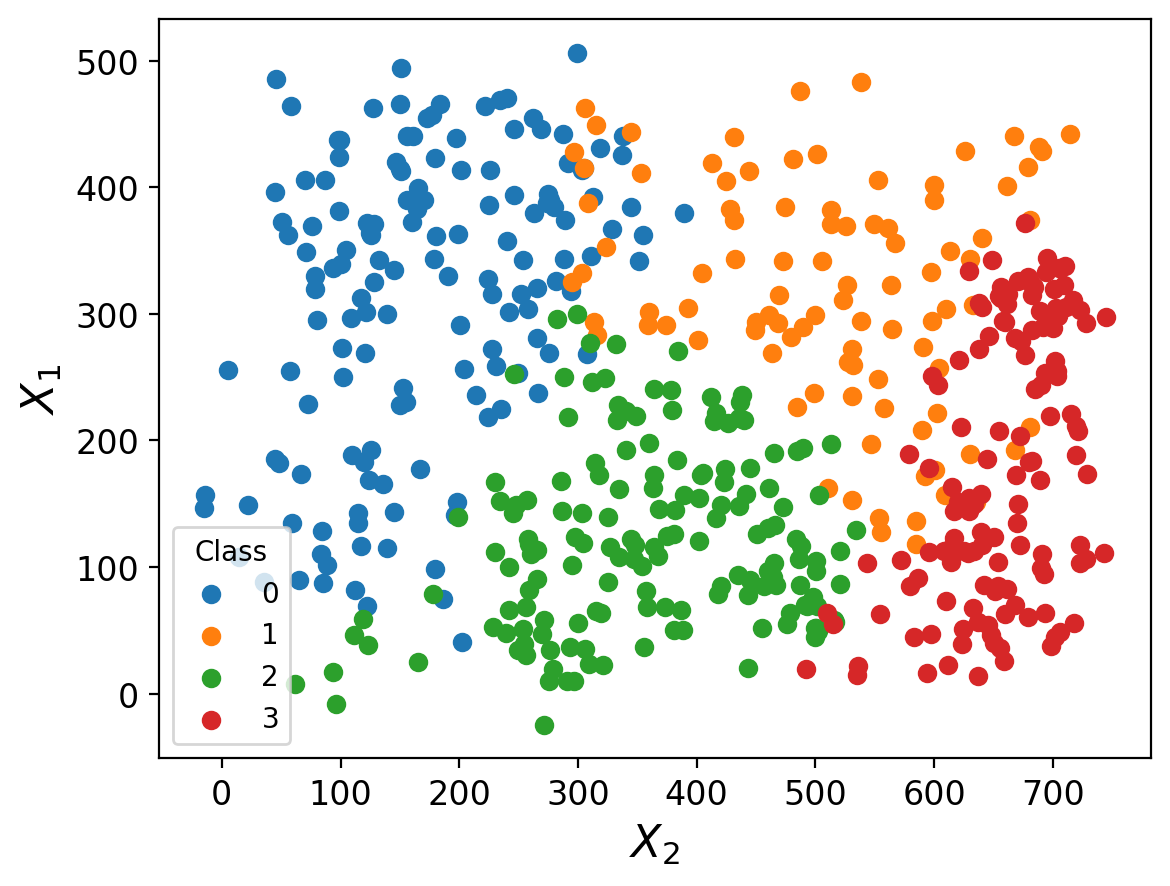

In [35]:
ax = plot_2d_classification(multi_data)


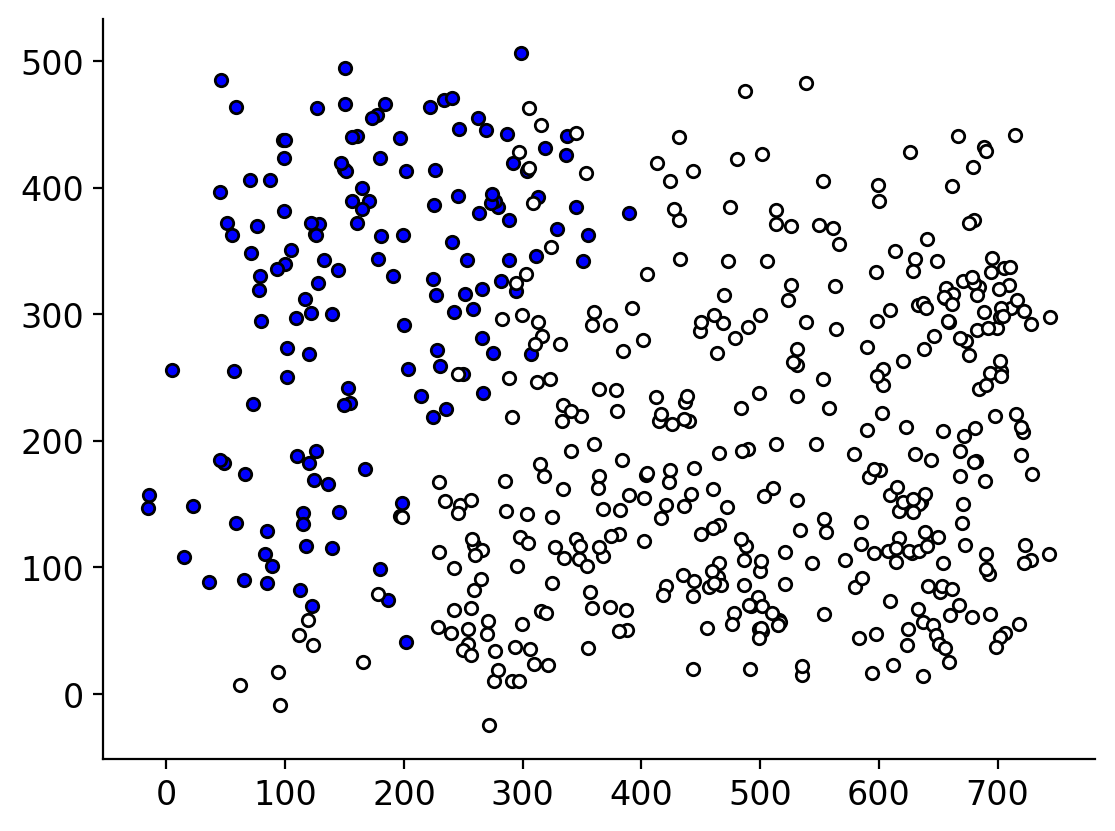

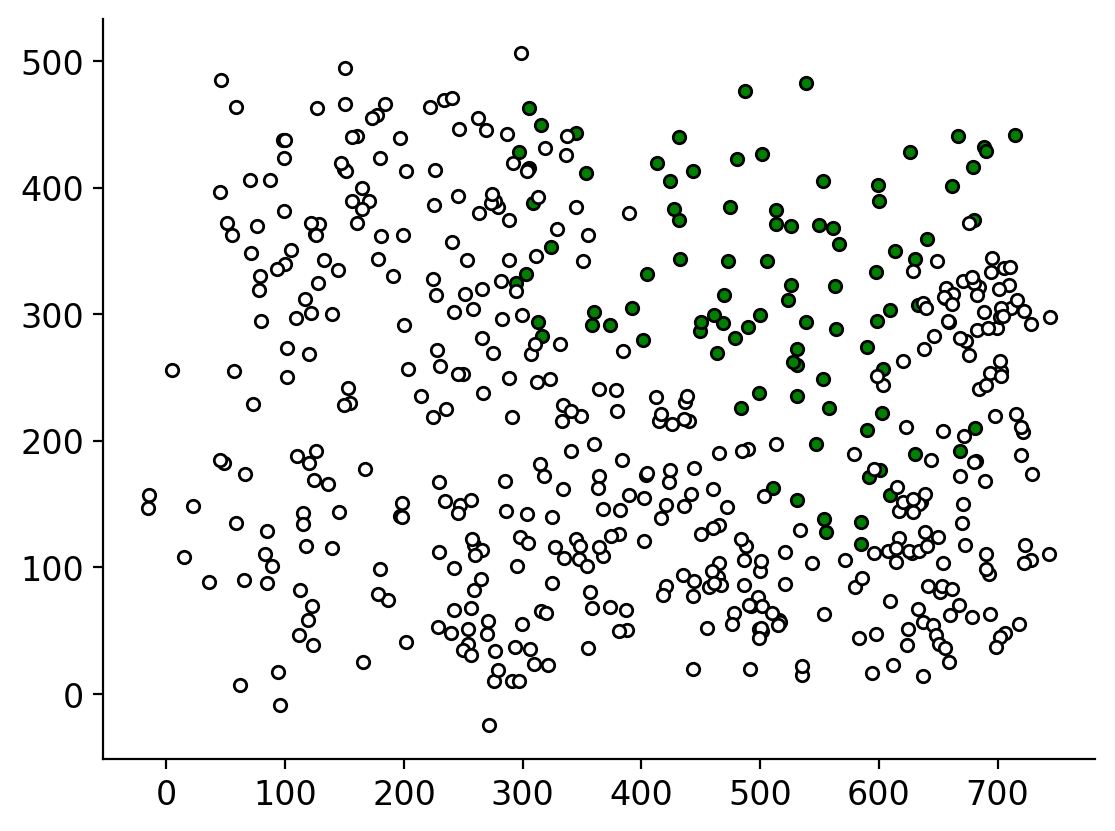

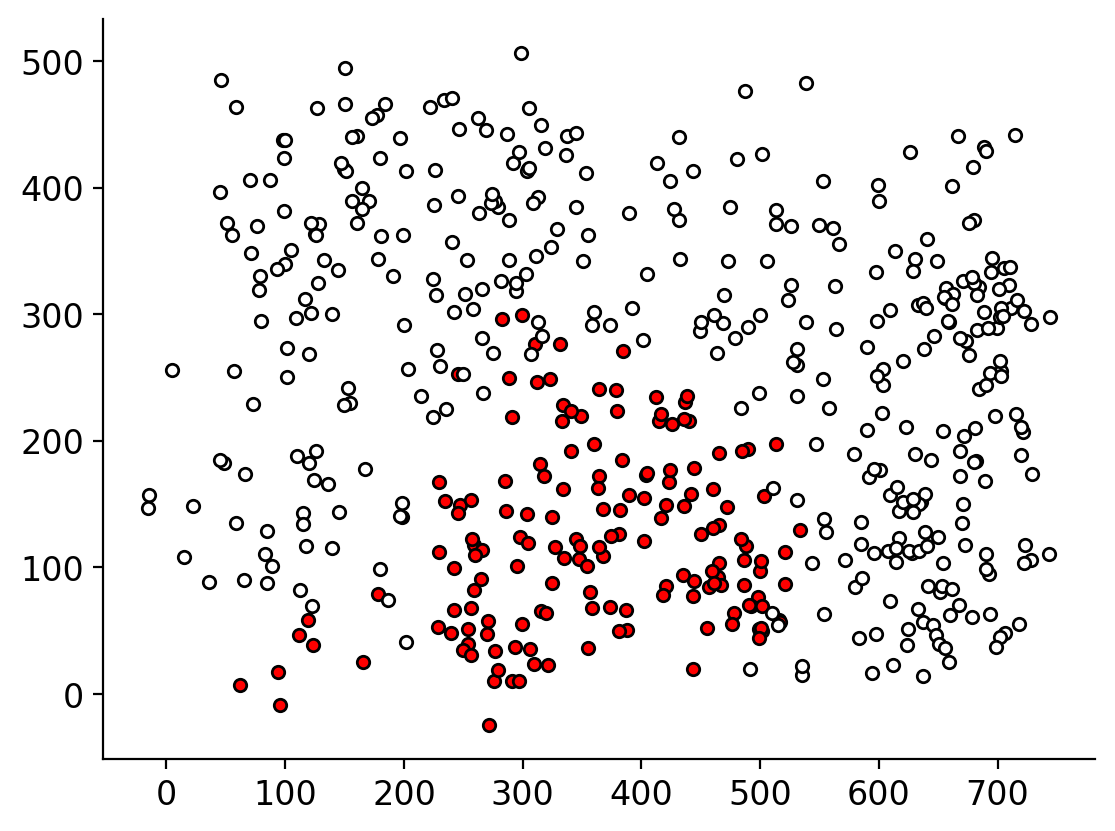

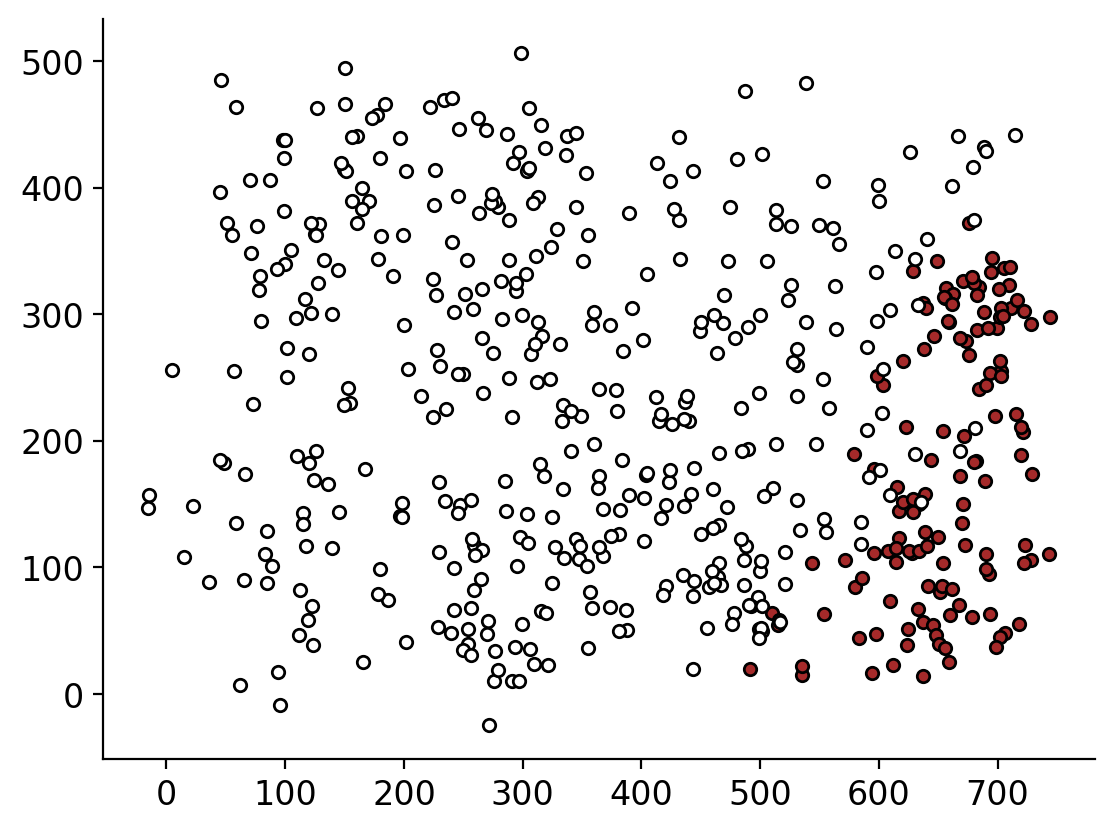

In [36]:
# Plot also the training points

colors = ["blue", "green", "red", "brown"]
for i, color in zip(model.classes_, colors):
    _, ax = plt.subplots()
    idx = np.where(y == i)
    ax.scatter(
        X.values[idx, 0], X.values[idx, 1], c=color, edgecolor="black", s=20
    )
    for j in zip(model.classes_):
        if j != i:
            idx = np.where(y == j)
            ax.scatter(
                X.values[idx, 0], X.values[idx, 1], c="white", edgecolor="black", s=20
            )

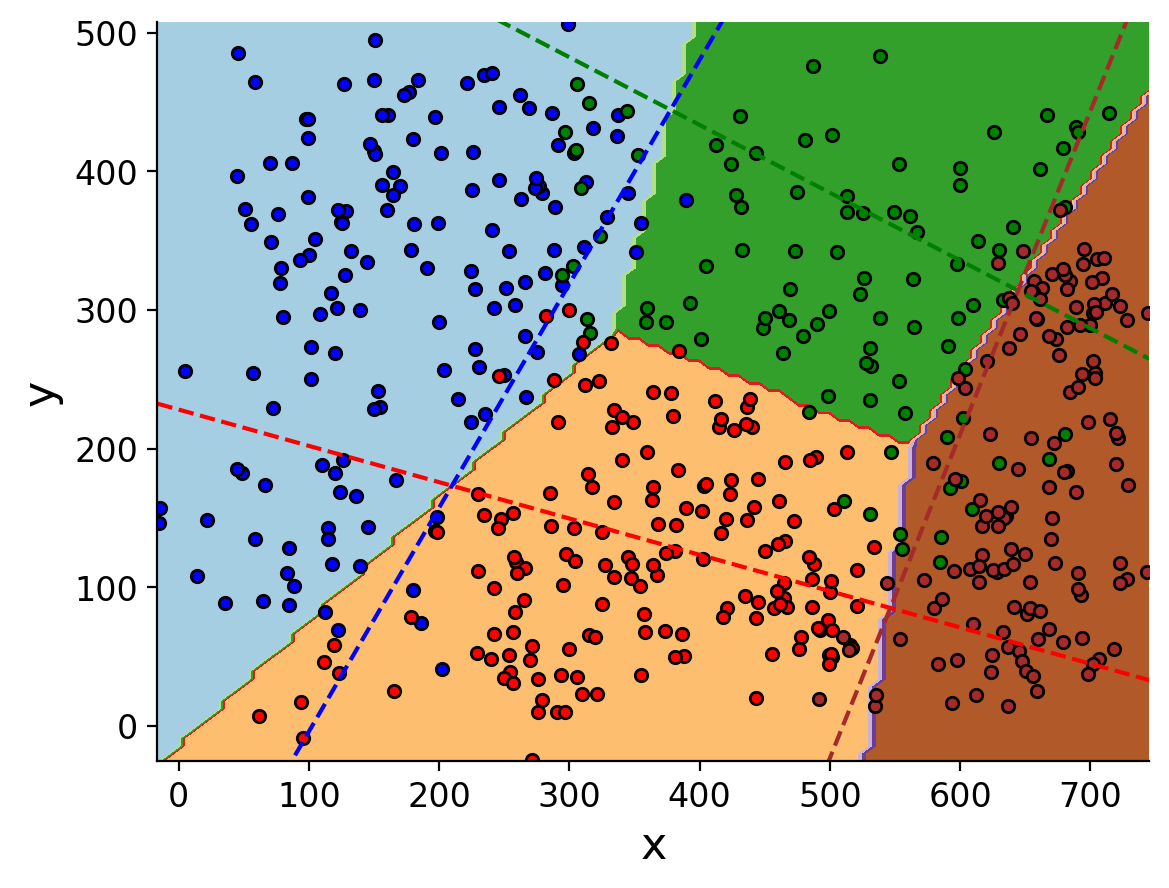

In [37]:
# Taken from https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
plt.axis("tight")

# Plot also the training points
colors = ["blue", "green", "red", "brown"]
for i, color in zip(model.classes_, colors):
    idx = np.where(y == i)
    ax.scatter(
        X.values[idx, 0], X.values[idx, 1], c=color, edgecolor="black", s=20
    )
# plt.axis("tight")
# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
    plot_hyperplane(i, color)

## Multinomial

In [38]:
X = multi_data[["x", "y"]]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(multi_data["color"])
# C is the inverse of the regulariazation strength.
# Setting it to a large value makes it roughly 0.
model = LogisticRegression(C=np.finfo("float32").max, random_state=RANDOM_STATE, multi_class="multinomial", max_iter=10_001)
model.fit(X, y)

LogisticRegression(C=3.4028235e+38, max_iter=10001, multi_class='multinomial',
                   random_state=666)

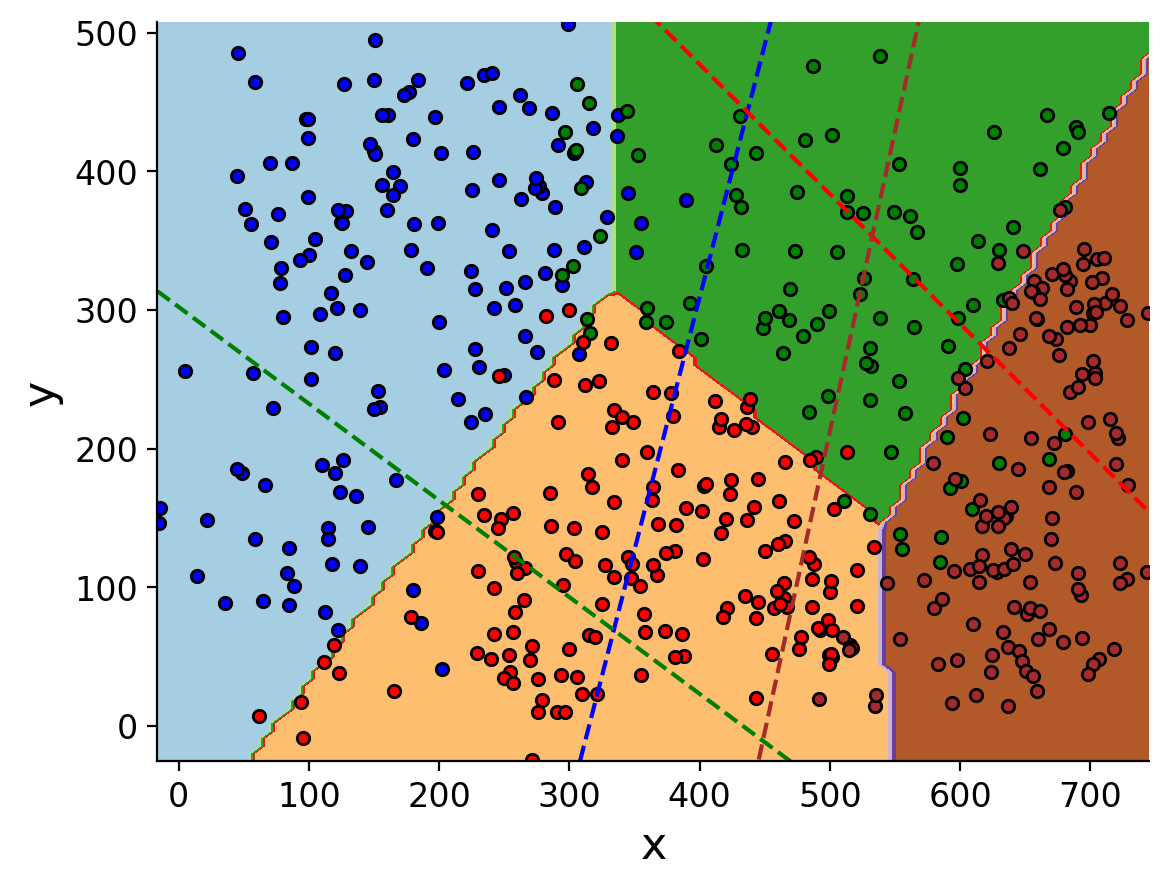

In [39]:
# Taken from https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
)
plt.axis("tight")

# Plot also the training points
colors = ["blue", "green", "red", "brown"]
for i, color in zip(model.classes_, colors):
    idx = np.where(y == i)
    ax.scatter(
        X.values[idx, 0], X.values[idx, 1], c=color, edgecolor="black", s=20
    )
# plt.axis("tight")
# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
    plot_hyperplane(i, color)

$$\mathcal{L_{CE}} = \sum_{i=1}^{N} \left( - \sum_{c=1}^{C} y_{ic} log\left( s\left( \mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta_{c}}}  \right) \right)  \right)$$

$$ s\left( \mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta_{c'}}}  \right) = \frac{e^{\mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta_{c'}}}}}{\sum_{c=1}^{C}e^{\mathbf{\vec{x_{i}}}\cdot\mathbf{\vec{\beta_{c}}}}}$$

$$
\begin{align}
F_{1} &= \frac{2}{\frac{1}{precision} + \frac{1}{recall}} \\
      &= 2 \frac{precision \cdot recall}{precision + recall}
\end{align}
$$

$$Precision_{c} = \frac{TP_{c}}{TP_{c} + FP_{c}}$$

$$Precision = \frac{\sum_{c}TP_{c}}{\sum_{c}TP_{c} + FP_{c}}$$

$$Precision = \frac{\sum_{c}^{C}\frac{TP_{c}}{TP_{c} + FP_{c}}}{C}$$

In [40]:
y_pred = model.predict(X)

In [41]:
confusion_matrix(y, y_pred)

array([[135,   6,   6,   0],
       [  9,  71,   3,  13],
       [  6,   5, 150,   0],
       [  0,   5,   5, 121]])